In [2]:
#Utilities main function
import utility
import os
import pandas as pd
from IPython.display import Image
original_wd = os.getcwd()

c:\Users\limzi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Main functions**

In [4]:
reviews = pd.read_csv("./data/reviews.csv")

### Preprocessing class

In [19]:
from preprocess_class import Dataset

# Simple demostration of how modify_stop_words_list method is being used
reviews_dataset = Dataset(reviews)

reviews_dataset.modify_stop_words_list(replace_stop_words_list = ["I", "am", "very"], include_words = ["happy"], exclude_words = ["very", "sad"])

reviews_dataset.stop_words_list

['I', 'am', 'happy']

In [21]:
# Steps to create necessary feature engineering
# Modify stop words list
# Use the create_* methods to generate feature engineer you require: bow, tfidf, word2vec, doc2vec (sklearn)
reviews_dataset = Dataset(reviews)
reviews_dataset.modify_stop_words_list(include_words=['price', 'quality', 'good', 'great'], exclude_words=["not", "no", "least"])
reviews_dataset.preprocessing_text(root_word_option = 0, remove_stop_words = True, lower_case = True, word_form = None)
reviews_dataset.create_bow(lower_case = True, ngrams = (1,1), max_doc = 0.95, min_doc = 5)

print("price removed from bag of words: ", 'price' not in reviews_dataset.feature_engineer[0].get_feature_names_out())
print("least not removed from bag of words: ", 'least' in reviews_dataset.feature_engineer[0].get_feature_names_out())

price removed from bag of words:  True
least not removed from bag of words:  True


### **Sentimental Analysis Pipeline**

#### 5 BERT-based models
#### All models were trained on ml.g4dn.2xlarge GPU with 5 fold-cross validation and evaluated with testing(holdout) dataset consisting 10% of original data
1. bert-base-uncased
2. bert-large-uncased 
3. distilbert-base-uncased
4. roberta-base 
5. roberta-large 

In [2]:
from sentimental_analysis.bert.train import *

[nltk_data] Downloading package punkt to /Users/gjj980/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gjj980/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/gjj980/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gjj980/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
bert_sentimental_main_folder_dir = "./sentimental_analysis/bert/"
bert_model_model_plots = os.path.join(bert_sentimental_main_folder_dir, "plots")

##### BERT-base logs

In [6]:
log_fileName = 'bert_base_sentimental.log'
bert_model_logs = os.path.join(bert_sentimental_main_folder_dir, "logs")

print(f'CONTENTS OF: {log_fileName}:')
print("\n")
with open(os.path.join(bert_model_logs, log_fileName), 'r') as file:
    for line in file:
        print(line)

CONTENTS OF: bert_base_sentimental.log:


Device availiable: cuda:0

Train_val dataset loaded

Training model

---------------------------------



Hyperparameters:

model name: bert-base-uncased

Number of epochs: 1

number of classes: 2

max length: 64

batch size: 32

learning rate: 1e-05



Loading data.....

Model initialised!



Test size: 545

Test data loaded!



 Current folds cross validation: 0



Train size: 4899

Train data loaded!



Val size: 980

Val data loaded!

Start training...



 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 

----------------------------------------------------------------------

   1    |   20    |   0.607863   |     -      |     -     |   7.12   

   1    |   40    |   0.520713   |     -      |     -     |   6.34   

   1    |   60    |   0.453493   |     -      |     -     |   6.39   

   1    |   80    |   0.412784   |     -      |     -     |   6.42   

   1    |   100   |   0.353378   |     -      |     -     |   6.47 

In [7]:
log_fileName = 'bert_large_sentimental.log'
print(f'CONTENTS OF: {log_fileName}:')
print("\n")
with open(os.path.join(bert_model_logs, log_fileName), 'r') as file:
    for line in file:
        print(line)

CONTENTS OF: bert_large_sentimental.log:


Device availiable: cuda:0

Train_val dataset loaded

Training model

---------------------------------



Hyperparameters:

model name: bert-large-uncased

Number of epochs: 1

number of classes: 2

max length: 64

batch size: 32

learning rate: 1e-05



Loading data.....

Model initialised!



Test size: 545

Test data loaded!



 Current folds cross validation: 0



Train size: 4899

Train data loaded!



Val size: 980

Val data loaded!

Start training...



 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 

----------------------------------------------------------------------

   1    |   20    |   0.579382   |     -      |     -     |   23.26  

   1    |   40    |   0.475475   |     -      |     -     |   22.23  

   1    |   60    |   0.318436   |     -      |     -     |   22.52  

   1    |   80    |   0.275299   |     -      |     -     |   22.93  

   1    |   100   |   0.243561   |     -      |     -     |   23.

In [8]:
log_fileName = 'distilbert_base_sentimental.log'
print(f'CONTENTS OF: {log_fileName}:')
print("\n")
with open(os.path.join(bert_model_logs, log_fileName), 'r') as file:
    for line in file:
        print(line)

CONTENTS OF: distilbert_base_sentimental.log:


Device availiable: cuda:0

Train_val dataset loaded

Training model

---------------------------------



Hyperparameters:

model name: distilbert-base-uncased

Number of epochs: 1

number of classes: 2

max length: 64

batch size: 32

learning rate: 1e-05



Loading data.....

Model initialised!



Test size: 545

Test data loaded!



 Current folds cross validation: 0



Train size: 4899

Train data loaded!



Val size: 980

Val data loaded!

Start training...



 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 

----------------------------------------------------------------------

   1    |   20    |   0.605940   |     -      |     -     |   3.82   

   1    |   40    |   0.532032   |     -      |     -     |   3.13   

   1    |   60    |   0.489879   |     -      |     -     |   3.14   

   1    |   80    |   0.423204   |     -      |     -     |   3.15   

   1    |   100   |   0.362204   |     -      |     -  

In [9]:
log_fileName = 'roberta_base_sentimental.log'
print(f'CONTENTS OF: {log_fileName}:')
print("\n")
with open(os.path.join(bert_model_logs, log_fileName), 'r') as file:
    for line in file:
        print(line)

CONTENTS OF: roberta_base_sentimental.log:


Device availiable: cuda:0

Train_val dataset loaded

Training model

---------------------------------



Hyperparameters:

model name: roberta-base

Number of epochs: 1

number of classes: 2

max length: 64

batch size: 32

learning rate: 1e-05



Loading data.....

Model initialised!



Test size: 545

Test data loaded!



 Current folds cross validation: 0



Train size: 4899

Train data loaded!



Val size: 980

Val data loaded!

Start training...



 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 

----------------------------------------------------------------------

   1    |   20    |   0.637665   |     -      |     -     |   7.09   

   1    |   40    |   0.521678   |     -      |     -     |   6.35   

   1    |   60    |   0.436224   |     -      |     -     |   6.35   

   1    |   80    |   0.368815   |     -      |     -     |   6.41   

   1    |   100   |   0.306000   |     -      |     -     |   6.43   

In [10]:
log_fileName = 'roberta_large_sentimental.log'
print(f'CONTENTS OF: {log_fileName}:')
print("\n")
with open(os.path.join(bert_model_logs, log_fileName), 'r') as file:
    for line in file:
        print(line)

CONTENTS OF: roberta_large_sentimental.log:


Device availiable: cuda:0

Train_val dataset loaded

Training model

---------------------------------



Hyperparameters:

model name: roberta-large

Number of epochs: 1

number of classes: 2

max length: 64

batch size: 32

learning rate: 1e-05



Loading data.....

Model initialised!



Test size: 545

Test data loaded!



 Current folds cross validation: 0



Train size: 4899

Train data loaded!



Val size: 980

Val data loaded!

Start training...



 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 

----------------------------------------------------------------------

   1    |   20    |   0.547414   |     -      |     -     |   22.61  

   1    |   40    |   0.324984   |     -      |     -     |   21.55  

   1    |   60    |   0.251278   |     -      |     -     |   21.77  

   1    |   80    |   0.199797   |     -      |     -     |   22.06  

   1    |   100   |   0.112814   |     -      |     -     |   22.39

##### Displayed below are the model metrics for Testing(Holdout) data for the 5 BERT model

| Model Name | Accuracy| Precision  | AUC | F1 | Sensitivity| Specificity |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| BERT BASE | 92% | 82% | 90% | 84% | 87% | 93% |
| BERT LARGE | 93% | 84%| 91%| 86%  | 88% | 94% |
| DistilBERT | 90% | 79%| 88%| 81%  | 83% | 92% |
| RoBERTa BASE | 94% | 88%| 93%| 89%  | 90% | 96% |
| RoBERTa LARGE | 95% | 92%| 93%| 90%  | 88% | 97% |

##### As you can see RoBERTa LARGE performs the best for f1 score(taking account in unbalance classes in holdout testset)
##### As such, we will be using the model for prediction in our web application/dockerised API

#### Determining of appropriate threshold probability to determine if a sentiment is positive or negative
#### Using RoBERTa LARGE model, this is how the AUC-ROC and PR curve looks like

In [12]:
print(os.listdir(bert_model_model_plots))
bert_model_model_plots
roc_curve = os.path.join(bert_model_model_plots, 'roberta_large_sentimental_roc_curve.png')
pr_curve = os.path.join(bert_model_model_plots, 'roberta_large_sentimental_pr_curve.png')

['.DS_Store', 'bert_base_sentimental_pr_curve.png', 'bert_base_sentimental_roc_curve.png', 'bert_large_sentimental_pr_curve.png', 'bert_large_sentimental_roc_curve.png', 'distilbert_base_sentimental_pr_curve.png', 'distilbert_base_sentimental_roc_curve.png', 'roberta_base_sentimental_pr_curve.png', 'roberta_base_sentimental_roc_curve.png', 'roberta_large_sentimental_pr_curve.png', 'roberta_large_sentimental_roc_curve.png']


##### ROC curve of RoBERTa LARGE

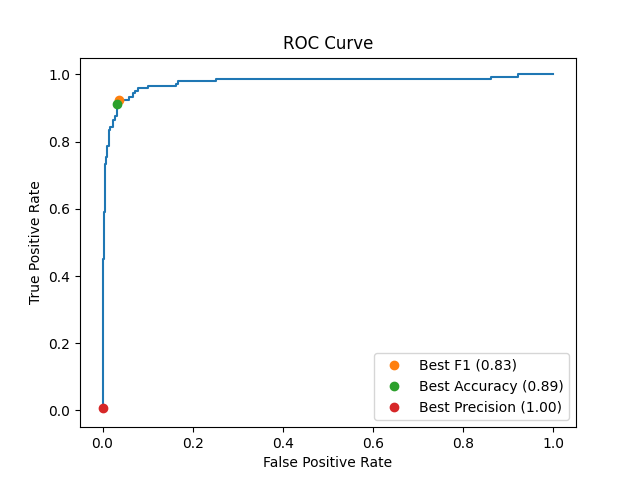

In [13]:
Image(filename = roc_curve)

##### Precision recall curve of RoBERTa LARGE

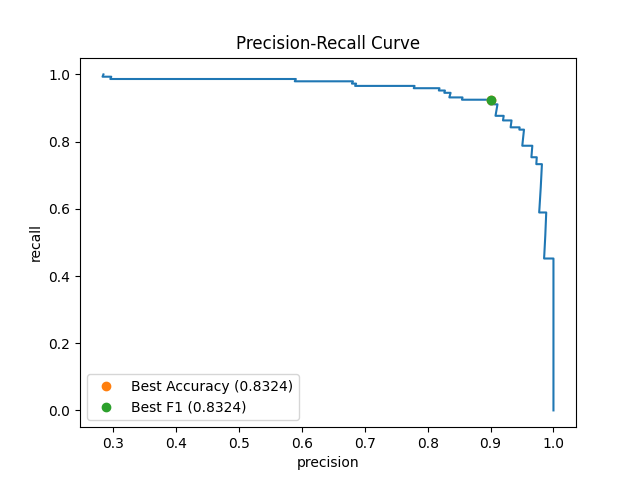

In [14]:
Image(filename=pr_curve)

Therefore, we choose 0.8324 to determine that it is a positive class.

##### Non-Bert Model

In [3]:
path = os.path.join(original_wd, 'sentimental_analysis\\non_bert')
os.chdir(path)
%run train
os.chdir(original_wd)

[10, 0.9052257331450745]
Training dataset has been loaded successfully

---------------------------------
LogisticRegression model succesfully trained

---------------------------------

model_accuracy:   0.52
model_precision:   0.77
model_auc:   0.54
model_f1score:   0.60
sensitivity:   0.49
specificity:   0.59

---------------------------------

Threshold parameter tuning

Prediction using best threshold for accuracy
-------------------------

model_accuracy:   0.74
model_precision:   0.74
model_auc:   0.50
model_f1score:   0.85
sensitivity:   1.00
specificity:   0.00
Best threshold for accuracy: 0.014069972785561553
Accuracy score at best threshold: 0.7410468319559229

---------------------------------



##### Model Metrics For Test Data for the 3 Non-Bert Models
| Model Name | Accuracy| Precision  | AUC | F1 | Sensitivity| Specificity |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| Logistic Regression | 62% | 89% | 68% | 69% | 56% | 79% |
| Random Forest | 71% | 86%| 70%| 79%  | 72% | 68% |
| XGBoost | 67% | 85%| 67%| 75%  | 67% | 67% |

### **Topic Modelling Pipeline**

##### Non-Bert Model

### Example of running a non_bert topic modelling

### Pre model training
- Identify word forms that interfere with generation of meaningful topics
(https://aclanthology.org/U15-1013/)
- Add on stop words that may affect the quality of topics generated

Citation:
Fiona Martin and Mark Johnson. 2015. More Efficient Topic Modelling Through a Noun Only Approach. In Proceedings of the Australasian Language Technology Association Workshop 2015, pages 111–115, Parramatta, Australia.

In [9]:
topic_key_words_before_filtering = pd.read_csv("./topic_modelling/non_bert/train_output/test_5/topic_key_words.csv")

for i in range(1,5):
    label = topic_key_words_before_filtering.iloc[i,0]
    key_words = ", ".join(topic_key_words_before_filtering.iloc[i, 1:].tolist())
    print(label)
    print(key_words, "\n")

carbohydrates
free, gluten, gluten free, mix, cracker, rice, pancake, pasta, flour, baking, family, gf, texture, waffle, great, graham, wheat, dairy, maple, bread 

animals_plants
treat, product, item, sauce, chicken, dog, package, bag, good, easy, received, company, amazon, time, came, hard, china, use, cheese, packaging 

spread_bread
butter, peanut, cake, peanut butter, bread, quick, quick easy, almond butter, rum, just like, easy, rice cake, cake mix, wal, bake, mart, pan, wal mart, soup, allergic 

products
price, product, store, food, love, amazon, great, bought, buy, taste, best, time, good, quality, chocolate, did, local, better, brand, hot 



Tokens like "buy", "bought", "just like", "quick easy" do not give us much insights about the topic while pasta, drinks, coffee, tea give us an idea about the type of products in the text. Adjectives like "gluten free" may also indicate some context to the topic, indicating healthy products. Hence, we focus on looking at nouns and adjective. However, there are also nouns and adjective that do not really value add to the topics such as "amazon", "taste", "great". We resolve this issue by adding words into stop words list.

In [2]:
from topic_modelling.non_bert.non_bert_topic_model import TopicModel

In [9]:
#example of training a model with LDA / NMF method
path = os.path.join(original_wd, 'topic_modelling\\non_bert')
os.chdir(path)
%run non_bert_topic_model
os.chdir(original_wd)

Train dataset loaded
---------------------------------

------Preprocessing text data--------
------ Training model --------

------ Distribution for number of documents in each topic --------

Topic 0: 116
Topic 1: 365
Topic 2: 274
Topic 3: 500
Topic 4: 125
Topic 5: 153
Topic 6: 272
Topic 7: 216
Topic 8: 801
Topic 9: 598
Topic 10: 227
Topic 11: 316
Topic 12: 315
Topic 13: 77
------4355 documents trained------
------ Generating key words and sample documents for each topic ------------


Topic 0
food, ingredient, baby, best, organic, baby food, earth, dog food, little, pet, real, jar, thing, earth best, dog, healthy, kind, dinner, meat, stuff

yummy, older, baby, food, texture, son, apple, sauce, half

refried, bean, kind, mexican, food, restaurant, cheese, case

condenser, microphone, dynamic, hum, signal, window, build, cheap

oat, bran, creamy, one-minute, quick, oat, taste, oat, perfect, food, somebody, diet, single, tablespoon, oat, bran

bold, taco, bell, spicy, ranchero, sauce, 

In [57]:
# show the topics, topic accuracy and average topic accuracy for each model

import re

log_path = os.path.join(os.getcwd(), "topic_modelling/non_bert/logs")

log_files = os.listdir(log_path)

model_eval = []

for file in log_files:
    if file.startswith("model"):
        file_path = os.path.join(log_path, file)
        with open(file_path) as f:
            f = f.readlines()

        topic_accuracy = pd.DataFrame(columns = ["Topic_label", "Accuracy"])
        counts = []
        for line in f:
            if len(re.findall(r"^Topic \d{1,2}:", line)) > 0:
                count = int(line.split(" ")[-1])
                counts.append(count)
            elif line.find("testing accuracy") > -1:
                curr_topic_accuracy = line.split(" ")
                topic_label = " ".join(curr_topic_accuracy[:-4])
                accuracy = float(curr_topic_accuracy[-1][:-1])
                curr_df = pd.DataFrame({'Topic_label': [topic_label], 'Accuracy': [accuracy]})
                topic_accuracy = pd.concat([topic_accuracy, curr_df])
            
            elif line.find("topic accuracy") > -1:
                average_accuracy = float(line.split(" ")[-2])
                
        topic_accuracy.insert(1, "Topic_count", counts)
        model_eval.append((topic_accuracy, average_accuracy))

In [65]:
# LDA (without changing doc_word_prior and topic_word_prior), 10 topics, bow (poor manual topic labelling as many topics consist of more 1 category, 
# every groups have similar distribution)
print(model_eval[1][0])
print("Average topic accuracy: ", model_eval[1][1])

      Topic_label  Topic_count  Accuracy
0   breakfast_tea          465     0.750
0          coffee          386     0.500
0     ingredients          400     0.500
0          drinks          487     0.625
0  baking_dessert          420     0.375
0         dog_cat          381     0.250
0    snacks_water          454     0.875
0         grocery          462     0.750
0    mains_spread          451     0.500
0      chips_corn          449     0.500
Average topic accuracy:  0.5625


In [66]:
# LDA, 14 topics, tfidf (same type of product spread across different topics)
print(model_eval[2][0])
print("Average topic accuracy: ", model_eval[2][1])

                      Topic_label  Topic_count  Accuracy
0                breakfast drinks          335     0.625
0                         service          141     0.875
0                         dessert          227     0.500
0  flavoured drinks_carbohydrates          522     0.625
0                    snacks_dairy           95     0.500
0                         dog_cat          459     0.625
0             family_sweet snacks          258     0.875
0                          coffee          134     0.125
0                sauce_condiments          319     0.750
0                     snack_chips          197     0.375
0      calories_protein_snack_bar          525     0.875
0                   coffee_drinks          521     0.750
0                         grocery          461     0.875
0                 crackers_snacks          161     0.250
Average topic accuracy:  0.6160714285714286


In [63]:
# NMF, 14 topics, bow (imbalance Topic count, poor manual topic labelling)
print(model_eval[0][0])
print("Average topic accuracy: ", model_eval[0][1])

topic_key_words_model_1 = pd.read_csv("./topic_modelling/non_bert/train_output/model_1/topic_key_words.csv")

label_0 = topic_key_words_model_1.iloc[0,0]
key_words_0 = ", ".join(topic_key_words_model_1.iloc[0, 1:].tolist())
print(label_0)
print(key_words_0, "\n")

label_13 = topic_key_words_model_1.iloc[12,0]
key_words_13 = ", ".join(topic_key_words_model_1.iloc[12, 1:].tolist())
print(label_13)
print(key_words_13, "\n")

           Topic_label  Topic_count  Accuracy
0              unknown          116     0.000
0               coffee          365     0.875
0                  tea          274     0.875
0            flavoring          500     1.000
0                 baby          125     0.250
0         healthy food          153     1.000
0                chips          272     0.250
0                  dog          216     0.625
0              grocery          801     0.625
0                snack          598     0.625
0         sweet drinks          227     0.625
0        carbohydrates          316     0.250
0  chocolate_milk_nuts          315     0.125
0                  cat           77     0.750
Average topic accuracy:  0.5625
unknown
food, ingredient, baby, best, organic, baby food, earth, dog food, little, pet, real, jar, thing, earth best, dog, healthy, kind, dinner, meat, stuff 

chocolate_milk_nuts
raw, different, aware, cacao, alive, hot, review, oil, coconut, brand, milk, powder, organic, coco

In [67]:
# NMF, 10 topics, tfidf
# Best performing model with highest accuracy
print(model_eval[3][0])
print("Average topic accuracy: ", model_eval[3][1])

          Topic_label  Topic_count  Accuracy
0              coffee          361     0.875
0                 tea          280     1.000
0     flavored drinks          612     0.500
0        cat_dog_baby          728     0.250
0               chips          207     0.875
0             grocery          413     0.875
0              snacks          651     0.875
0      chocolate_milk          476     0.500
0  bag_packaging_meat          408     0.500
0                 dog          219     0.625
Average topic accuracy:  0.6875


In [16]:
#if want to read in sample code
topic_samples = pd.read_csv("./data/topics_samples.csv")
topic_samples_dataset = Dataset(topic_samples)
pickled_model = os.path.join(os.getcwd(), "topic_modelling/non_bert/train_output/model_4/training_NMF_model_10.pk")
pickled_vectorizer = os.path.join(os.getcwd(), "topic_modelling/non_bert/train_output/model_4/training_tfidf_vectorizer_10.pk")
topic_label = os.path.join(os.getcwd(), "topic_modelling/non_bert/train_output/model_4/topic_key_words.csv")

predictions = test(topic_samples_dataset, "NMF", replace_stop_words_list_in = None, 
                   include_words_in = ['price', 'flavor', 'quality', 'taste', 'tasty', 'nice', 'good', 'great', 'amazon', 'year', 'month', 'day', 'order', 'product'],
                   exclude_words_in = [], root_word_option_in = 2, remove_stop_words_in = True, lower_case_in = True, word_form_in = ['noun'],
                   ngrams_in = (1,2), max_doc_in = 1, min_doc_in = 1, test_output_path_in = os.getcwd(), pickled_model_in = pickled_model,
                   pickled_vectorizer_in = pickled_vectorizer, topic_label_in = topic_label)

predictions

,Text,Topic_label
0,This coffee smells very fragrant. Best coffee ...,coffee
1,I fed this canned food to my pet dog. It just ...,cat_dog_baby
2,Irresponsible seller. My son got sick after dr...,chocolate_milk
3,My kitty needed to see the vet after consuming...,cat_dog_baby
4,How is this pancake low in sugar. It is so swe...,flavored drinks
5,Chrysanthemum tea always soothes my minds. Gre...,tea


We selected the last model as the final model since we obtained the highest sample topic accuracy of the 4 different models.

### Zero-shot model

In [18]:
from topic_modelling.non_bert.zero_shot_class import PredictTopic

data_path = "./data/topics_samples.csv"
new_feedback = PredictTopic(data_path)
new_feedback.train(["cat", "dog", "condiments", "snacks", "carbohydrates", "family",
                       "sauce", "drinks", "healthy alternatives", "household"])
print(new_feedback.predict())

zero_shot_final_results = pd.read_csv("./topic_modelling/non_bert/test_zero_shot_output/zero_shot_full_prediction.csv")
zero_shot_final_results = zero_shot_final_results.merge(reviews.reset_index(), how = "left", left_on = "original index", right_on = "index")
print(zero_shot_final_results.sample(5, random_state=100)[['Text', 'labels', 'scores']])
zero_shot_final_results['labels'].unique()

                                        original text                labels
0   This coffee smells very fragrant. Best coffee ...                drinks
2   I fed this canned food to my pet dog. It just ...                   dog
4   Irresponsible seller. My son got sick after dr...                drinks
6   My kitty needed to see the vet after consuming...                   cat
8   How is this pancake low in sugar. It is so swe...  healthy alternatives
11  Chrysanthemum tea always soothes my minds. Gre...                drinks
                                                   Text      labels    scores
2004  It's a spreadable jelly, sweet but not too swe...         NaN  0.380852
1210  Tasted bland - did not have the freshness and ...  condiments  0.553230
2599  I always have been of Crystal Light products s...      drinks  0.766479
561   This is the first time we bought this tea from...      drinks  0.737325
1360  I always have a case or two of Maruchan ramen ...         NaN  0.472323


array(['dog', 'healthy alternatives', 'drinks', 'snacks', 'family', nan,
       'cat', 'household', 'carbohydrates', 'condiments', 'sauce'],
      dtype=object)

In [8]:
zero_shot_final_results['labels'].fillna("unknown", inplace=True)
zero_shot_final_results['labels'].value_counts()

drinks                  1686
unknown                 1530
snacks                   858
healthy alternatives     652
dog                      170
condiments               149
family                   139
sauce                    101
cat                       68
carbohydrates             54
household                 37
Name: labels, dtype: int64

Zero shot may have high accuracy of assigning the labels to each text. However, many texts are labelled as unknown due to poor topic labelling and lack of background of the data. Hence, zero shot model is not preferred for this project.

##### Bert Model

In [7]:
from topic_modelling.bert.BERTopic_model import BERTopic_model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tingy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tingy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tingy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tingy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#The model can be trained by running the train.py file in topic_modelling\bert
#The details of the model is saved in the 
path = os.path.join(original_wd, 'topic_modelling\\bert')
os.chdir(path)
%run train.py
#The topic names are determined manually by inspection of key words contributing to the topic cluster and looking at samples
#The evaluate.py details the manual steps I took to name the topics
%run evaluate.py

In [10]:
#List of training log of the BERTopic models after training
for file in os.listdir('logs'):
    f = open(f'logs\\{file}', 'r')
    print(f.read())

Training model
---------------------------------

model name: bert-base-uncased-key-unigram
Coherence score: -0.295115775035504
    Topic  Count                                              Name
0      -1   3121         -1_decaffeinated_pistachios_moldy_ketchup
1       0    224    0_marshmellows_receommend_toothpicks_dandelion
2       1    165  1_veterinarian_constipated_pancreatitis_sorbitol
3       2    156              2_sauteing_souffles_pickle_precooked
4       3    114     3_accommodating_walgreens_tantalizing_courmet
5       4    107                   4_twizzler_oaty_squishy_nuffins
6       5     79       5_netgrocer_grocercy_vitamuffins_superfresh
7       6     75            6_disappionted_tweaked_raccoons_mmmmmm
8       7     73          7_cholocates_komboloi_unsealed_raincoast
9       8     70    8_bioflavonoids_refreshment_concoction_splends
10      9     50             9_unreasonble_slush_suggessted_kahula
11     10     46             10_kerig_complait_pistachio_unpacking
1

In [11]:
bertopic_model = BERTopic_model()
bertopic_model.load_model('sentence-transformers-key-bigram-v2')
topic,prob,topic_name = bertopic_model.predict('I cannot start my day without a snicker bar, you are not you when hungry')

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
topic_name

['Snack Bars']

### **Dockerised API**

In [1]:
import requests
import io
import csv

In [ ]:
###Create a scoring function with
filename = 'data/reviews_one_month.csv'

def score(filename_path, output_path = 'reviews_test_predictions_DSApes.csv'):
    #Call Sentimental_analysis via Docker API
    url = 'http://localhost:5000/upload'

    with open(filename_path, 'rb') as file:
        response = requests.post(url, files={'file': file, 'local':True})
    if response.ok:
        content = response.content.decode('utf-8')
        csv_reader = csv.reader(content.splitlines(), delimiter=',')
        csv_file = io.StringIO()
        csv_writer = csv.writer(csv_file)
        
        for row in csv_reader:
            csv_writer.writerow(row)

        csv_data = csv_file.getvalue()
        with open(output_path, 'w', newline='') as f:
            f.write(csv_data)
            
    #Return csv file name as reviews_test_predictions_DSAPES.csv
    #Text, Time, Sentimental Probabilities, Sentiments
        return True
    return False

In [ ]:
score(filename)